In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("Data_for_UCI_named.csv")
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

**Columns**
- tau1 -tau4 -reaction time for each network
- tau1 - supplier node
- tau2 -tau4 consumer node
- p1 - p4 nominal power (+ve -supplied, -ve consumed) by each network participant
- g1 - g4 price elasticity coefficient each participant
- g1 supplier node; g2 - g4 consumer node
- stab - real part of characteristic diff equation(shows stability of the system)
- stabf -binary output (stable or unstable)

In [4]:
# dropping the stab column because of its direct relationship to stabf
data.drop(["stab"],axis = 1 ,inplace =True) 

In [5]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [6]:
data.shape

(10000, 13)

In [7]:
outs = data["stabf"].value_counts()

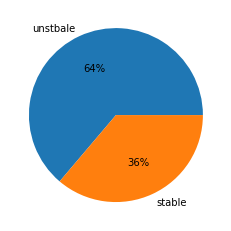

In [8]:
labels = ["unstbale","stable"]
plt.pie(outs,autopct = '%0.0f%%',labels = labels)
plt.show()

In [9]:
data["stabf"].replace({"unstable":0,"stable":1},inplace = True)

In [10]:
import sklearn.utils
data = sklearn.utils.shuffle(data)
data.head(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
451,8.309858,9.912268,7.244932,2.866097,3.766522,-1.273130,-0.902455,-1.590937,0.953958,0.536801,0.416680,0.730962,0
1125,8.816300,0.657628,6.017656,7.201482,3.693783,-0.566424,-1.720474,-1.406885,0.120743,0.426883,0.286134,0.663353,1
9436,0.709987,3.759741,4.332556,3.436550,3.150851,-1.285347,-1.154503,-0.711001,0.222419,0.228896,0.098996,0.674134,1
1830,0.810919,8.133520,0.549575,4.083202,2.448035,-1.089582,-0.827983,-0.530470,0.195460,0.862780,0.808818,0.762745,1
7504,0.804085,2.722758,4.948073,8.295177,4.295193,-1.744385,-1.639673,-0.911135,0.765210,0.422261,0.903972,0.949381,0
1527,5.144624,3.164021,7.165081,2.350117,4.618156,-1.589954,-1.770409,-1.257793,0.590940,0.741652,0.299025,0.477551,0
3670,4.313229,8.800665,8.423380,3.042440,3.891847,-1.130950,-1.337420,-1.423477,0.377237,0.738711,0.780026,0.730375,0
6408,6.368253,9.884245,9.129394,8.442731,4.247885,-0.582664,-1.951936,-1.713285,0.135608,0.392424,0.264535,0.866100,0
534,1.248102,5.066338,7.694813,7.751935,4.372760,-0.708990,-1.686951,-1.976819,0.222495,0.131015,0.433945,0.526905,1
6279,9.119494,1.289318,2.748770,8.469520,2.556311,-0.698877,-0.817958,-1.039476,0.301850,0.749918,0.795404,0.609319,1


In [11]:
X = data.iloc[:,0:-1]
y= data.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [13]:
X_train.shape,X_test.shape

((8000, 12), (2000, 12))

In [14]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_samp, y_Samp = smote.fit_resample(X_train,y_train)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train= scaler.fit_transform(X_samp)
scaled_x_train = pd.DataFrame(scaled_x_train)
y_Samp = y_Samp.array.reshape(-1,1)
scaled_y_train = scaler.fit_transform(y_Samp)
scaled_y_train = pd.DataFrame(scaled_y_train)

In [16]:
scaled_x_test = scaler.fit_transform(X_test)
scaled_x_test = pd.DataFrame(scaled_x_test)

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [18]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
rfc = RandomForestClassifier(random_state = 1)
etc = ExtraTreesClassifier(random_state = 1)


In [19]:
# Random Forest
model1 = rfc.fit(scaled_x_train,scaled_y_train.values.ravel())
ypred = model1.predict(scaled_x_test)
accuracy1 = accuracy_score(y_test,ypred)
accuracy1

0.3615

In [20]:
# Extra trees classifier
model2 = etc.fit(scaled_x_train, scaled_y_train.values.ravel())
ypred2 = model2.predict(scaled_x_test)
accuracy2 = accuracy_score(ypred2,y_test)
accuracy2

0.365

In [23]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
model3 = xgb.fit(scaled_x_train,scaled_y_train.values.ravel())
accuracy3 = cross_val_score(model3,scaled_x_test,y_test)
np.mean(accuracy3)*100

[16:31:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harriet.Cherogony\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harriet.Cherogony\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harriet.Cherogony\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harriet.Cherogony\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harriet.Cherogony\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


90.9

In [ ]:
from lightgbm import LGBMClassifier
lgc = LGBMClassifier(random_state = 1)
model4 = lgc.fit(scaled_x_train,scaled_y_train.values.ravel())
ypred = model4.predict(scaled_x_test)
accuracy = accuracy_score(y_test,ypred)
accuracy